In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


df = pd.read_csv(r"D:\Infosys SpringBoard\Milestone 2 dataset updated for 3.csv") 


print("Dataset Shape:", df.shape)

print(df.columns.tolist())
display(df.head())


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 737, in start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "C:\Users\VIJAYENDRA\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 737, in start

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Dataset Shape: (1000, 11)
['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural', 'Education_time', 'Recreational_time', 'Age_band']


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Education_time,Recreational_time,Age_band
0,14,male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,1.180141,2.809859,14-15
1,11,female,4.61,Laptop,True,0.30,Poor Sleep,Urban,1.063846,3.546154,8-11
2,18,female,3.73,TV,True,0.32,Poor Sleep,Urban,0.904242,2.825758,16-18
3,15,female,1.21,Laptop,False,0.39,NaN,Urban,0.339496,0.870504,14-15
4,12,female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1.936980,3.953020,12-13


In [4]:
# Data Preprocessing
# Creating Health impact per row as Health_impact_Count
df['Health_Impact_Count'] = df['Health_Impacts'].apply(
    lambda x: len([i for i in str(x).split(', ') if i != 'None']) if pd.notna(x) else 0
)

# Creating Screen_Time_Level
df['Screen_Time_Level'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], 
                                bins=[0, 3, 6, 12, 20],
                                labels=['Low', 'Medium', 'High', 'Very High'])

#who dominates the most Recreation or education
df['Usage_Type'] = np.where(df['Educational_to_Recreational_Ratio'] > 0.5, 
                           'Educational Dominant', 'Recreational Dominant')

print("Data preprocessing completed!")
print(f"Health Impact Count range: {df['Health_Impact_Count'].min()} - {df['Health_Impact_Count'].max()}")
print("\nScreen Time Level distribution:")
# print(df['Screen_Time_Level'].value_counts())
display(df.head())

Data preprocessing completed!
Health Impact Count range: 0 - 4

Screen Time Level distribution:


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Education_time,Recreational_time,Age_band,Health_Impact_Count,Screen_Time_Level,Usage_Type
0,14,male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,1.180141,2.809859,14-15,2,Medium,Recreational Dominant
1,11,female,4.61,Laptop,True,0.30,Poor Sleep,Urban,1.063846,3.546154,8-11,1,Medium,Recreational Dominant
2,18,female,3.73,TV,True,0.32,Poor Sleep,Urban,0.904242,2.825758,16-18,1,Medium,Recreational Dominant
3,15,female,1.21,Laptop,False,0.39,NaN,Urban,0.339496,0.870504,14-15,0,Low,Recreational Dominant
4,12,female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1.936980,3.953020,12-13,2,Medium,Recreational Dominant


In [5]:
# WEEK 5: Cohort Analysis

# Age Band & Primary Device Cohort Analysis
print("COHORT ANALYSIS: Age Band & Primary Device")

cohort_age_device = df.pivot_table(
    index='Age_band',
    columns='Primary_Device',
    values=['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 'Health_Impact_Count'],
    aggfunc={'Avg_Daily_Screen_Time_hr': 'mean',
             'Educational_to_Recreational_Ratio': 'mean',
             'Health_Impact_Count': 'mean'}
).round(2)

print("Average Screen Time by Age Band and Device:")
print(cohort_age_device['Avg_Daily_Screen_Time_hr'])

COHORT ANALYSIS: Age Band & Primary Device
Average Screen Time by Age Band and Device:
Primary_Device  Laptop  Smartphone    TV  Tablet
Age_band                                        
12-13             4.68        4.38  4.77    4.24
14-15             4.35        4.67  4.38    4.74
16-18             4.79        4.53  4.47    4.26
8-11              4.40        4.08  4.27    4.44


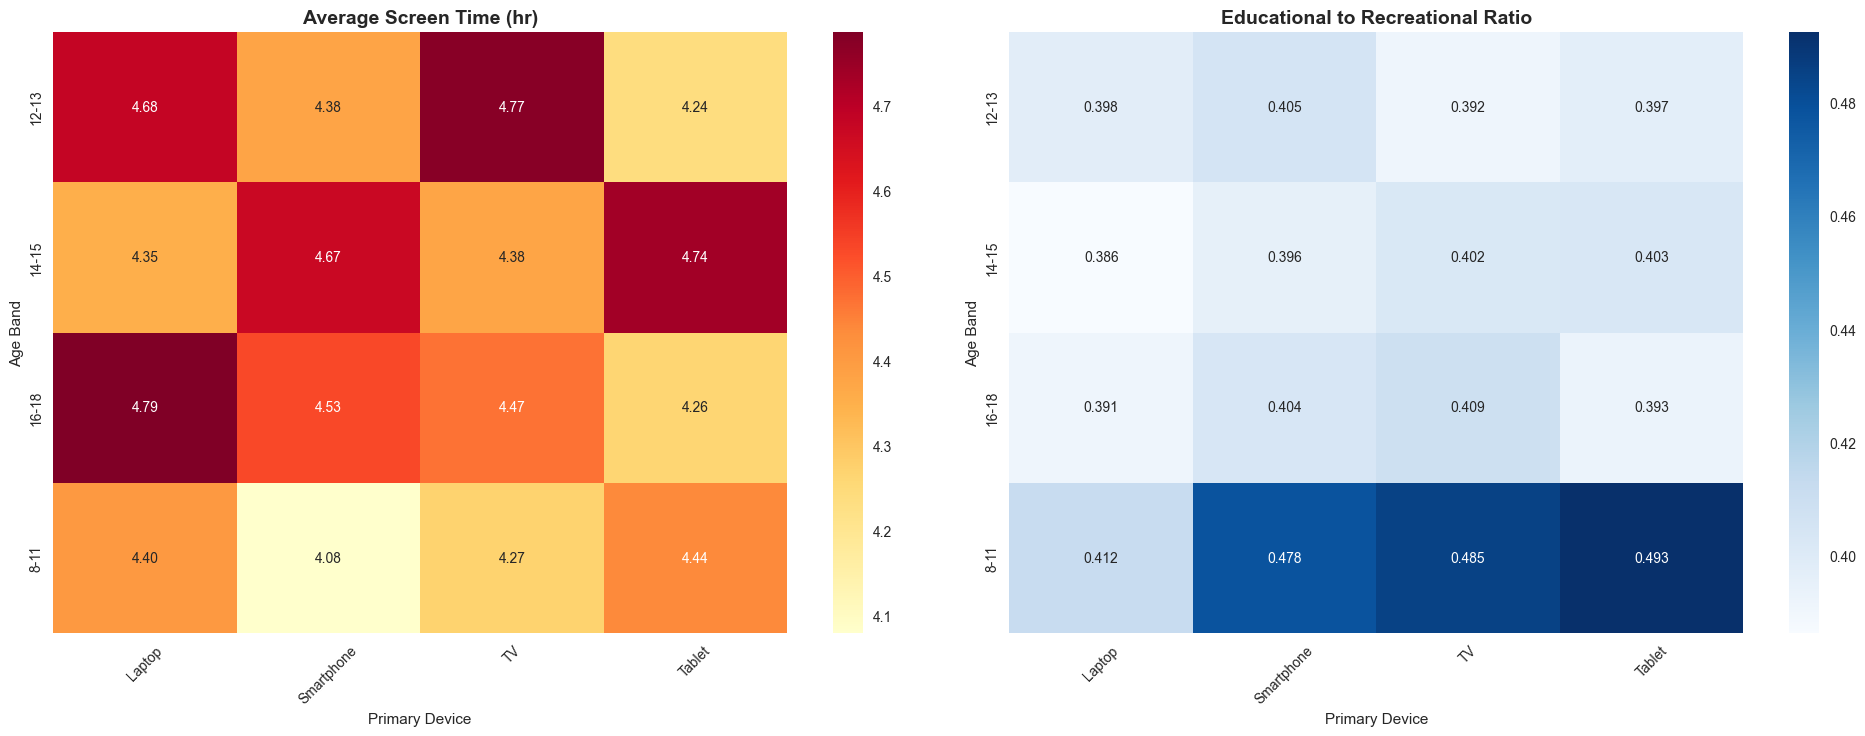

In [6]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: Average Screen Time
screen_time_pivot = df.pivot_table(
    index='Age_band',
    columns='Primary_Device',
    values='Avg_Daily_Screen_Time_hr',
    aggfunc='mean'
)
sns.heatmap(screen_time_pivot, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[0])
axes[0].set_title('Average Screen Time (hr)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Primary Device')
axes[0].set_ylabel('Age Band')
axes[0].tick_params(axis='x', rotation=45)

# Heatmap 2: Educational to Recreational Ratio
ratio_pivot = df.pivot_table(
    index='Age_band',
    columns='Primary_Device',
    values='Educational_to_Recreational_Ratio',
    aggfunc='mean'
)
sns.heatmap(ratio_pivot, annot=True, cmap='Blues', fmt='.3f', ax=axes[1])
axes[1].set_title('Educational to Recreational Ratio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Age Band')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()


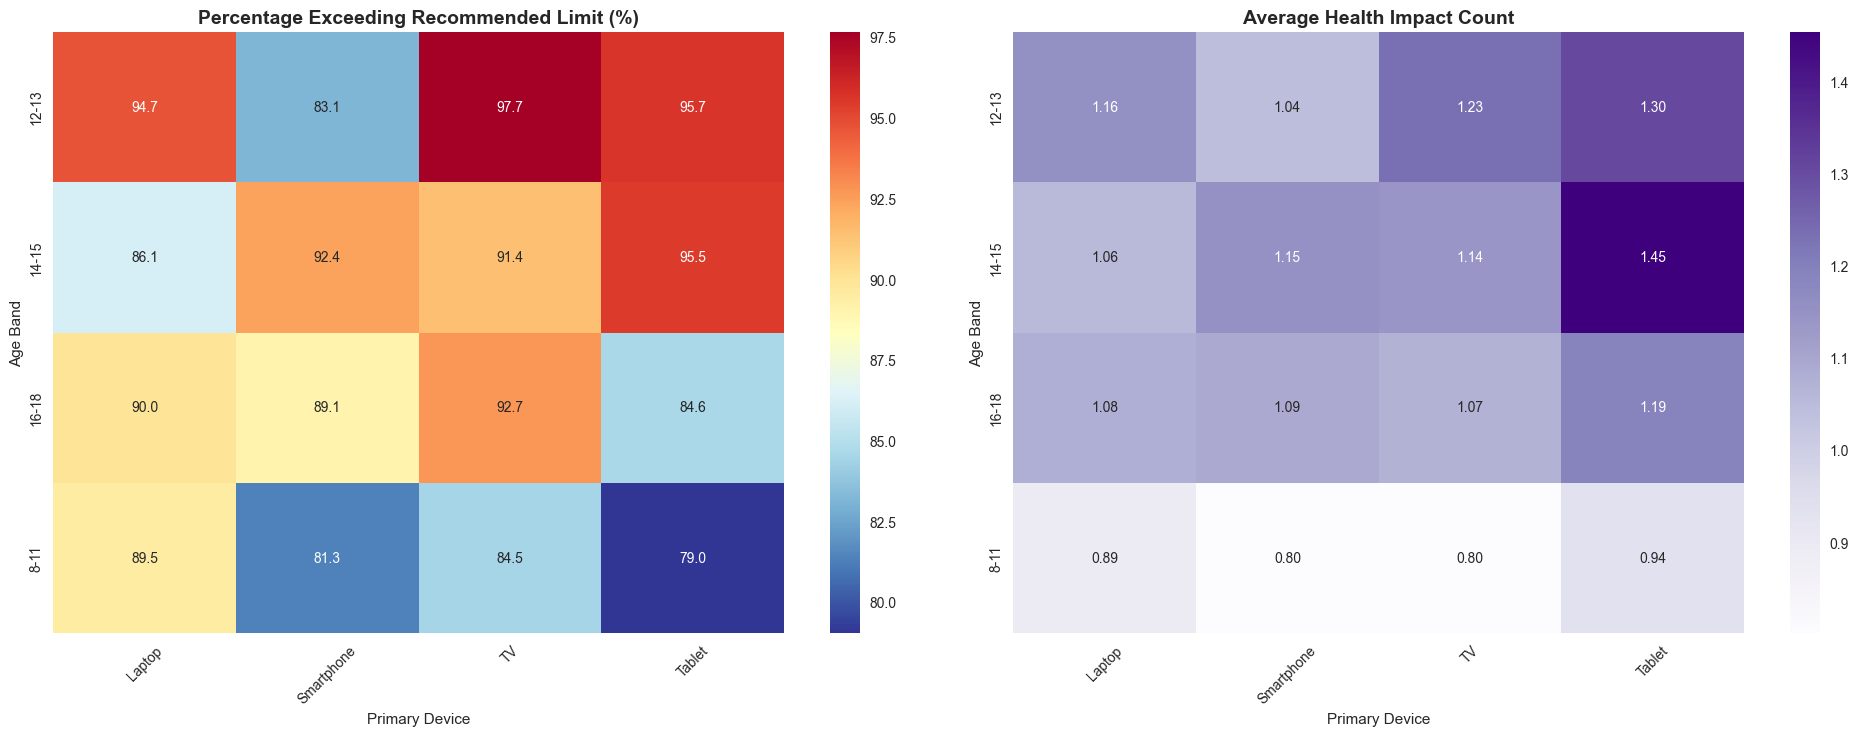

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 3: Exceeded Limit Percentage
exceed_pivot = df.pivot_table(
    index='Age_band',
    columns='Primary_Device',
    values='Exceeded_Recommended_Limit',
    aggfunc=lambda x: (x.sum() / len(x)) * 100
)
sns.heatmap(exceed_pivot, annot=True, cmap='RdYlBu_r', fmt='.1f', ax=axes[0])
axes[0].set_title('Percentage Exceeding Recommended Limit (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Primary Device')
axes[0].set_ylabel('Age Band')
axes[0].tick_params(axis='x', rotation=45)

# Heatmap 4: Health Impact Count
health_pivot = df.pivot_table(
    index='Age_band',
    columns='Primary_Device',
    values='Health_Impact_Count',
    aggfunc='mean'
)
sns.heatmap(health_pivot, annot=True, cmap='Purples', fmt='.2f', ax=axes[1])
axes[1].set_title('Average Health Impact Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Primary Device')
axes[1].set_ylabel('Age Band')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

location , Screen Time & Exceeded Limit


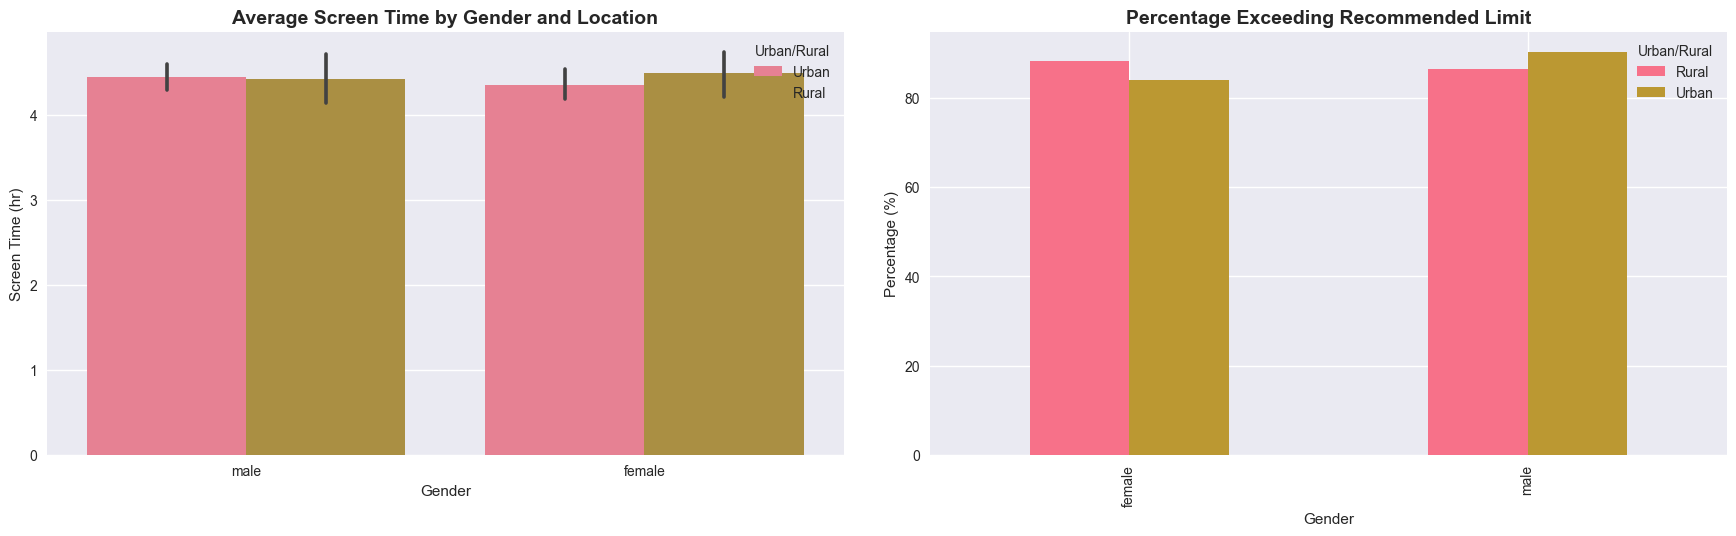

In [8]:
print("location , Screen Time & Exceeded Limit")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Screen Time by Gender and Location
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', ax=axes[0])
axes[0].set_title('Average Screen Time by Gender and Location', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Screen Time (hr)')
axes[0].set_xlabel('Gender')
axes[0].legend(title='Urban/Rural')

# Exceeded Limit Percentage
exceed_summary = df.groupby(['Gender', 'Urban_or_Rural'])['Exceeded_Recommended_Limit'].mean() * 100
exceed_summary.unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Percentage Exceeding Recommended Limit', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Gender')
axes[1].legend(title='Urban/Rural')

plt.tight_layout(pad=3.0)
plt.show()

 Location , Health Impacts & Educational Ratio 


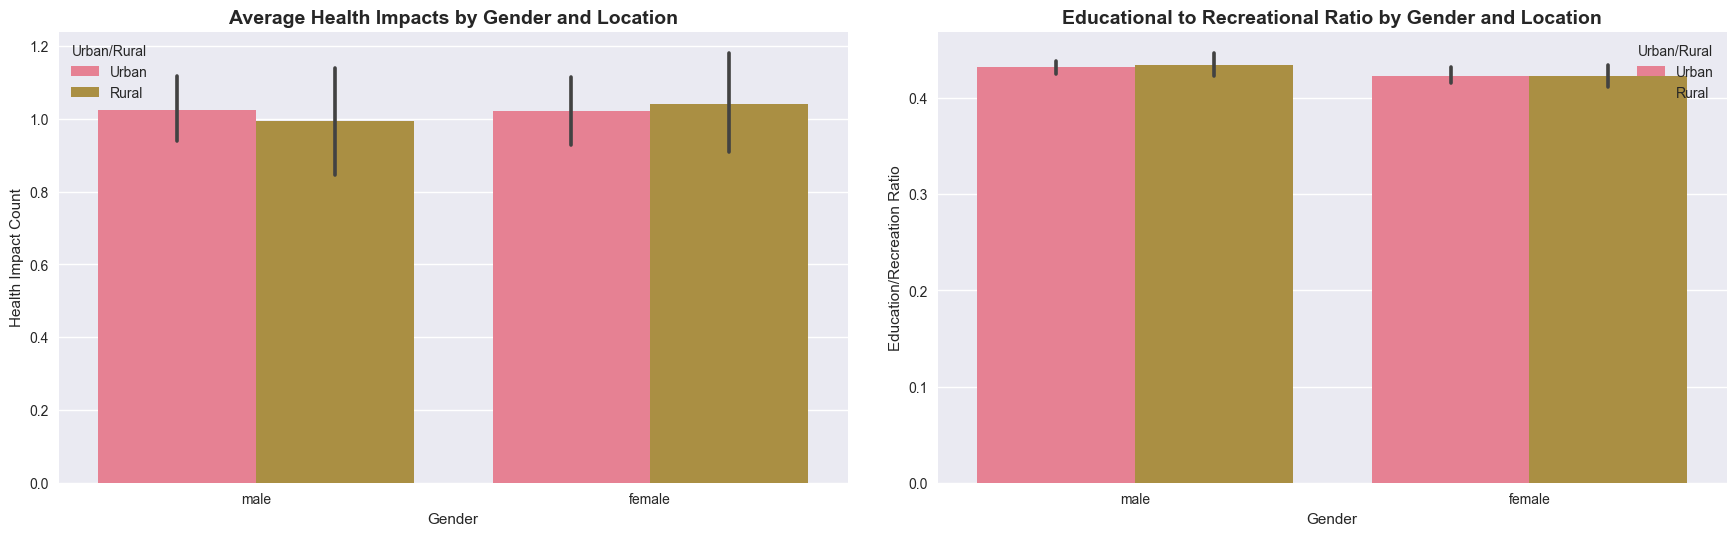

In [9]:
print(" Location , Health Impacts & Educational Ratio ")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Health Impacts by Gender and Location
sns.barplot(data=df, x='Gender', y='Health_Impact_Count', hue='Urban_or_Rural', ax=axes[0])
axes[0].set_title('Average Health Impacts by Gender and Location', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Health Impact Count')
axes[0].set_xlabel('Gender')
axes[0].legend(title='Urban/Rural')

# Educational Ratio by Gender and Location
sns.barplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio', hue='Urban_or_Rural', ax=axes[1])
axes[1].set_title('Educational to Recreational Ratio by Gender and Location', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Education/Recreation Ratio')
axes[1].set_xlabel('Gender')
axes[1].legend(title='Urban/Rural')

plt.tight_layout(pad=3.0)
plt.show()

HEALTH IMPACTS ANALYSIS
Top Health Impacts:
Poor Sleep      504
Eye Strain      248
Anxiety         154
Obesity Risk    115
Name: count, dtype: int64


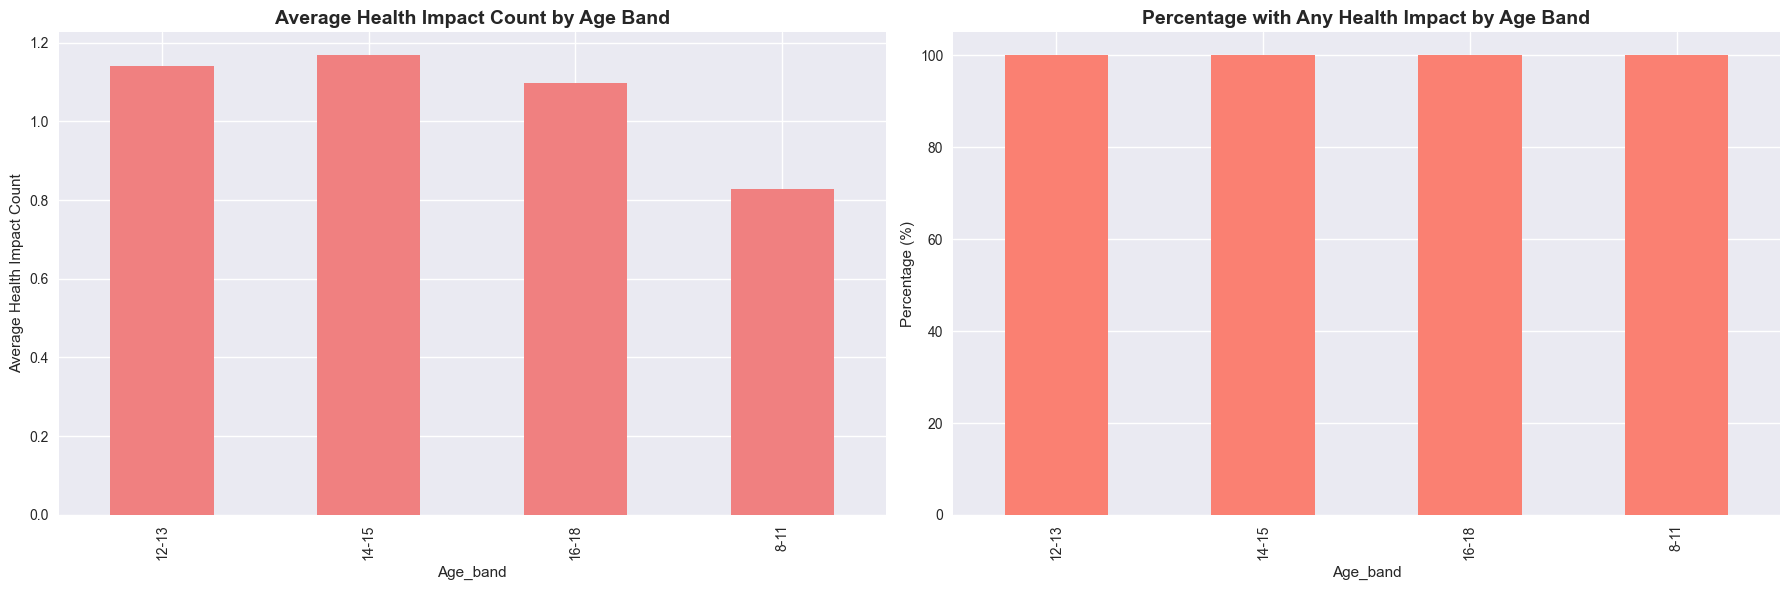

In [10]:
# Health Impact Analysis by Cohorts
print("HEALTH IMPACTS ANALYSIS")

all_health_impacts = []
for impacts in df['Health_Impacts'].dropna():
    if impacts != 'None':
        all_health_impacts.extend([impact.strip() for impact in str(impacts).split(',')])

health_impact_counts = pd.Series(all_health_impacts).value_counts()
print("Top Health Impacts:")
print(health_impact_counts.head(10))

# Health impacts by age band
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Health impact distribution by age
health_by_age = df.groupby('Age_band')['Health_Impact_Count'].mean()
health_by_age.plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Average Health Impact Count by Age Band', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Health Impact Count')

# Percentage with any health impact
any_health_impact = df.groupby('Age_band')['Health_Impacts'].apply(
    lambda x: (x != 'None').sum() / len(x) * 100
)
any_health_impact.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Percentage with Any Health Impact by Age Band', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

=== STATISTICAL ANALYSIS AND KEY INSIGHTS ===


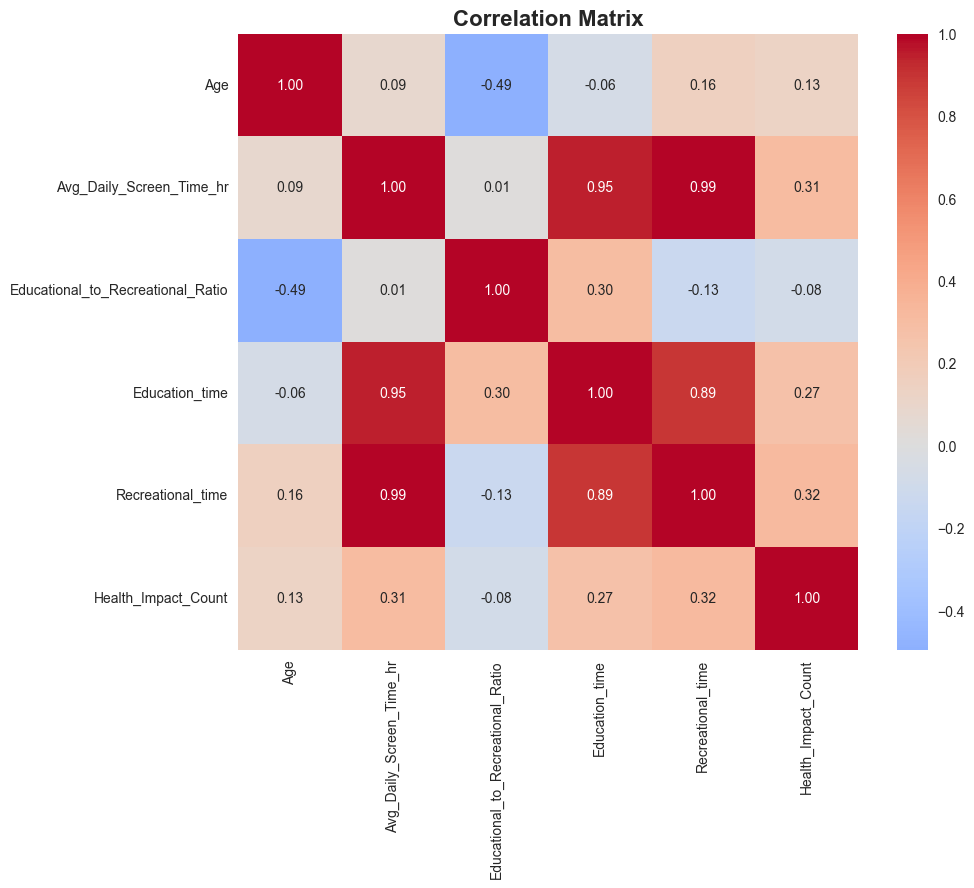


=== KEY STATISTICAL TESTS ===
Urban vs Rural Screen Time - t-stat: -0.505, p-value: 0.614
Screen Time across Age Bands - F-stat: 2.946, p-value: 0.032


In [11]:
# 4. Statistical Analysis and Key Insights
print("=== STATISTICAL ANALYSIS AND KEY INSIGHTS ===")

# Correlation analysis
correlation_matrix = df[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 
                        'Education_time', 'Recreational_time', 'Health_Impact_Count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

# Key statistical tests
print("\n=== KEY STATISTICAL TESTS ===")

# Test 1: Difference in screen time between urban and rural
urban_screen = df[df['Urban_or_Rural'] == 'Urban']['Avg_Daily_Screen_Time_hr']
rural_screen = df[df['Urban_or_Rural'] == 'Rural']['Avg_Daily_Screen_Time_hr']
t_stat, p_value = stats.ttest_ind(urban_screen, rural_screen)
print(f"Urban vs Rural Screen Time - t-stat: {t_stat:.3f}, p-value: {p_value:.3f}")

# Test 2: Screen time across age bands
age_groups = [df[df['Age_band'] == band]['Avg_Daily_Screen_Time_hr'] for band in df['Age_band'].unique()]
f_stat, p_value = stats.f_oneway(*age_groups)
print(f"Screen Time across Age Bands - F-stat: {f_stat:.3f}, p-value: {p_value:.3f}")

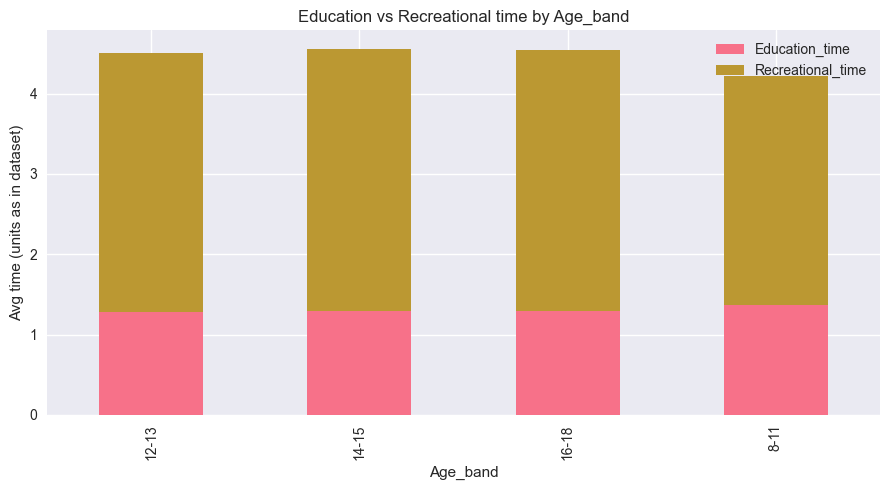

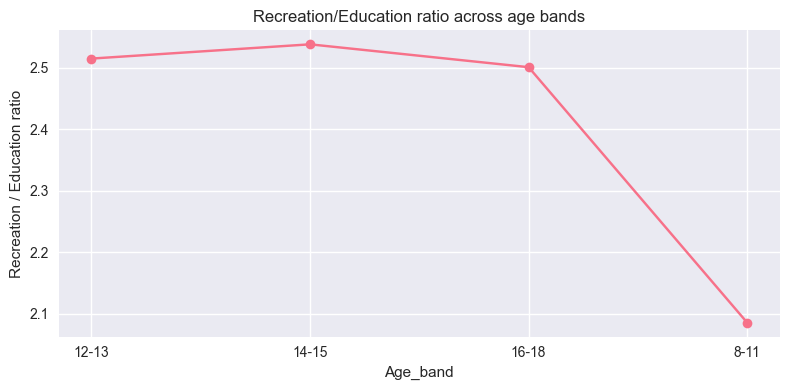

In [12]:
#  Age_band comparisons  
if 'Age_band' in df.columns and 'Education_time' in df.columns and 'Recreational_time' in df.columns:
    agg = df.groupby('Age_band')[['Education_time','Recreational_time']].mean().sort_index()
    ax = agg.plot(kind='bar', stacked=True, figsize=(9,5))
    ax.set_ylabel('Avg time (units as in dataset)')
    ax.set_title('Education vs Recreational time by Age_band')
    plt.tight_layout()
    plt.show()

    ratio = (agg['Recreational_time'] / (agg['Education_time'].replace(0,np.nan))).reset_index()
    plt.figure(figsize=(8,4))
    plt.plot(ratio['Age_band'], ratio[0], marker='o')
    plt.xlabel('Age_band')
    plt.ylabel('Recreation / Education ratio')
    plt.title('Recreation/Education ratio across age bands')
    plt.tight_layout()
    plt.show()
else:
    print("Missing columns for age-band comparisons.")


,group,n,avg_rec_time,avg_edu_time,avg_health
0,exceeded,874,3.354157,1.427777,NaN
1,not_exceeded,126,1.362723,0.558785,NaN


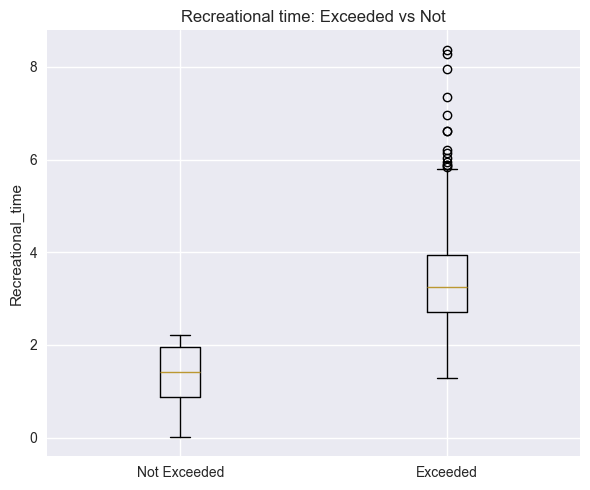

In [13]:
# Exceeded vs Not (weekday/weekend proxy) =====

for col in ['Health_Impacts','Education_time','Recreational_time']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'Exceeded_Recommended_Limit' in df.columns:
    exg = df[df['Exceeded_Recommended_Limit']==1]
    non = df[df['Exceeded_Recommended_Limit']==0]
    
    summary = pd.DataFrame({
        'group': ['exceeded','not_exceeded'],
        'n': [exg.shape[0], non.shape[0]],
        'avg_rec_time': [exg['Recreational_time'].mean(), non['Recreational_time'].mean()],
        'avg_edu_time': [exg['Education_time'].mean(), non['Education_time'].mean()],
        'avg_health': [exg['Health_Impacts'].mean(), non['Health_Impacts'].mean()]
    })
    display(summary)

    # Boxplots for Recreational_time
    plt.figure(figsize=(6,5))
    data = [non['Recreational_time'].dropna(), exg['Recreational_time'].dropna()]
    plt.boxplot(data, labels=['Not Exceeded','Exceeded'])
    plt.ylabel('Recreational_time')
    plt.title('Recreational time: Exceeded vs Not')
    plt.tight_layout()
    plt.show()
else:
    print("Exceeded_Recommended_Limit column not present.")

,usage_bin,n,mean_edu_time,mean_rec_time,avg_health,pct_exceed
0,Low,103,0.511417,1.105476,NaN,20.388350
1,Medium,290,0.979000,2.377793,NaN,84.827586
2,High,607,1.617295,3.788817,NaN,100.000000


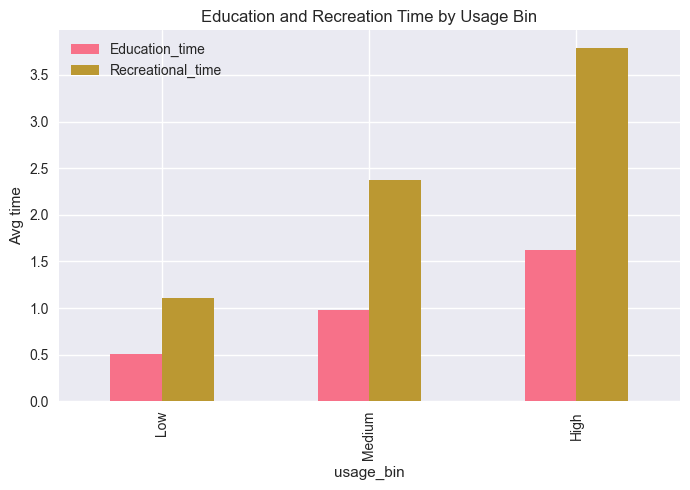

In [14]:

if 'Avg_Daily_Screen_Time_hr' in df.columns:
    bins = [-1, 2.5, 4.0, 1e6]
    labels = ['Low','Medium','High']
    df['usage_bin'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], bins=bins, labels=labels)
    bin_summary = df.groupby('usage_bin').agg(
        n=('Age','count'),
        mean_edu_time=('Education_time','mean') if 'Education_time' in df.columns else ('Age','count'),
        mean_rec_time=('Recreational_time','mean') if 'Recreational_time' in df.columns else ('Age','count'),
        avg_health=('Health_Impacts','mean') if 'Health_Impacts' in df.columns else ('Age','count'),
        pct_exceed=('Exceeded_Recommended_Limit', lambda x: 100*x.mean() if 'Exceeded_Recommended_Limit' in df.columns else np.nan)
    ).reset_index()
    display(bin_summary)

    # grouped bar plot of mean education vs recreational by usage bin
    if 'Education_time' in df.columns and 'Recreational_time' in df.columns:
        bs = df.groupby('usage_bin')[['Education_time','Recreational_time']].mean()
        ax = bs.plot(kind='bar', figsize=(7,5))
        ax.set_ylabel('Avg time')
        ax.set_title('Education and Recreation Time by Usage Bin')
        plt.tight_layout()
        plt.show()
else:
    print("Avg_Daily_Screen_Time_hr not available for usage bins.")
